## > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Overview
To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

Question that can analyised from this data set
1. Movies which had most and least profit
2. Movies with largest and lowest budgets
3. Movies with most and least earned revenu.
4. Movies with longest and shortest runtime values
5. Average runtime of all the movies.
6. In which year we had most no.of profitable movies.
7. Average budget (with respest to the profitable movies)
8. Average revenue (with respest to the profitable movies)
9. Average duration of the movie (with respest to the profitable movies)


In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data= pd.read_csv('tmdb-movies.csv')
data.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing the unused information from the dataset )

1. Remove unused column
2. we need to remove duplicacy (if any)
3. Removing 0's from budget and revenue column
4. Replace 0's with NAN in runtime column
5. Changing datatype and revenue column

In [16]:
#Remove unused column
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
data= data.drop(del_col,1)

#previewing the new dataset
data.head(4)

budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
1  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
2         Adventure|Science Fiction|Thriller      3/18/15          2015  
3   Action|Adventure|Science Fiction|Fantasy     12/15/15          2015

In [17]:
# We need to remove duplicacy
row, col=data.shape
print("There are {} total entries of movies and {} no of columns in it ".format(row-1, col))

There are 10865 total entries of movies and 10 no of columns in it 


In [18]:
data.drop_duplicates(keep='first',inplace=True)
row, col=data.shape
print("There are {} total entries of movies and {} no of columns in it ".format(row-1, col))


There are 10864 total entries of movies and 10 no of columns in it 


So there is duplicate row and it was removed 

In [19]:
# Removing 0's from budget and revenue colmun
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
data[temp_list] = data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
data.dropna(subset = temp_list, inplace = True)

rows, col = data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


In [20]:
# Replace 0's with NAN in runtime column
data['runtime'] =data['runtime'].replace(0, np.NAN)

In [21]:
# changing datatype and revenue column
change_type=['budget', 'revenue']
#changing data type
data[change_type]=data[change_type].applymap(np.int64)
data.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.





1. calculating the profit of each movie 

In [22]:
data.insert(2,'profit_earned',data['revenue']-data['budget'])

#previewing the changes in the dataset
data.head(2)

budget     revenue  profit_earned      original_title  \
0  150000000  1513528810     1363528810      Jurassic World   
1  150000000   378436354      228436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

              tagline  runtime                                     genres  \
0   The park is open.      124  Action|Adventure|Science Fiction|Thriller   
1  What a Lovely Day.      120  Action|Adventure|Science Fiction|Thriller   

  release_date  release_year  
0       6/9/15          2015  
1      5/13/15          2015

### Research Question 1 (Movies which had least and maximum profit)

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def calculate(column):
    #for highest earned profit
    q= data[column].idxmax()
    w=pd.DataFrame(data.loc[q])
    
    #for lowest earned profit
    l= data[column].idxmin()
    t=pd.DataFrame(data.loc[l])
    
    #collectin data in one place
    z=pd.concat([w, t], axis=1)
    
    return z

#calling the function
calculate('profit_earned')


1386  \
budget                                                  237000000   
revenue                                                2781505847   
profit_earned                                          2544505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                             12/10/09   
release_year                                                 2009   

                                                             2244  
budget                                                  425000000  
revenue                                                  11087569  
profit_earned                                          -413912431  
original_title                                  The Warrior's Way  
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                               Sngmoo Lee  
tagline                                   Assassin. Hero. Legend.  
runtime                                                       100  
genres                  Adventure|Fantasy|Action|Western|Thriller  
release_date                                              12/2/10  
release_year                                                 2010

Column  id 1386 has the highest  profit  2544505847 .

Whereas the column  id 2244 has the lowest profit -413912431

### Research Question 2  (Movies with largest and lowest budgets!)

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calculate('budget')

2244  \
budget                                                  425000000   
revenue                                                  11087569   
profit_earned                                          -413912431   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
tagline                                   Assassin. Hero. Legend.   
runtime                                                       100   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                              12/2/10   
release_year                                                 2010   

                                                             2618  
budget                                                          1  
revenue                                                       100  
profit_earned                                                  99  
original_title                                       Lost & Found  
cast            David Spade|Sophie Marceau|Ever Carradine|Step...  
director                                             Jeff Pollack  
tagline         A comedy about a guy who would do anything to ...  
runtime                                                        95  
genres                                             Comedy|Romance  
release_date                                              4/23/99  
release_year                                                 1999

Column id 2244 has the largest budget 425000000 .

Whereas the column id 2618 has the smallest budget  1 

### Research Question 3 (Movies with most and least earned revenue)


In [25]:
calculate('revenue')

1386  \
budget                                                  237000000   
revenue                                                2781505847   
profit_earned                                          2544505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                             12/10/09   
release_year                                                 2009   

                                                             5067  
budget                                                    6000000  
revenue                                                         2  
profit_earned                                            -5999998  
original_title                                    Shattered Glass  
cast            Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...  
director                                                Billy Ray  
tagline                                                       NaN  
runtime                                                        94  
genres                                              Drama|History  
release_date                                             11/14/03  
release_year                                                 2003

Column  id 1386 has the largest revenue 2781505847 .

Whereas the column id 5067 has the smallest revenue 2.


### Research Question 4 (Movies with longest and shortest runtime)


In [26]:
calculate('runtime')

2107  \
budget                                                   18000000   
revenue                                                    871279   
profit_earned                                           -17128721   
original_title                                             Carlos   
cast            Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...   
director                                          Olivier Assayas   
tagline                            The man who hijacked the world   
runtime                                                       338   
genres                               Crime|Drama|Thriller|History   
release_date                                              5/19/10   
release_year                                                 2010   

                                                             5162  
budget                                                         10  
revenue                                                         5  
profit_earned                                                  -5  
original_title                                        Kid's Story  
cast            Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...  
director                                      Shinichiro Watanabe  
tagline                                                       NaN  
runtime                                                        15  
genres                                  Science Fiction|Animation  
release_date                                               6/2/03  
release_year                                                 2003

Column id 2107 has the longest runtime 338 minutes.

Whereas the column id 5162 has the shortest runtime 15 minutes

### Research Question 5 (Average runtime of the movies)

In [27]:
def avg(column):
    return data[column].mean()

In [28]:
avg('runtime')

109.22029060716139

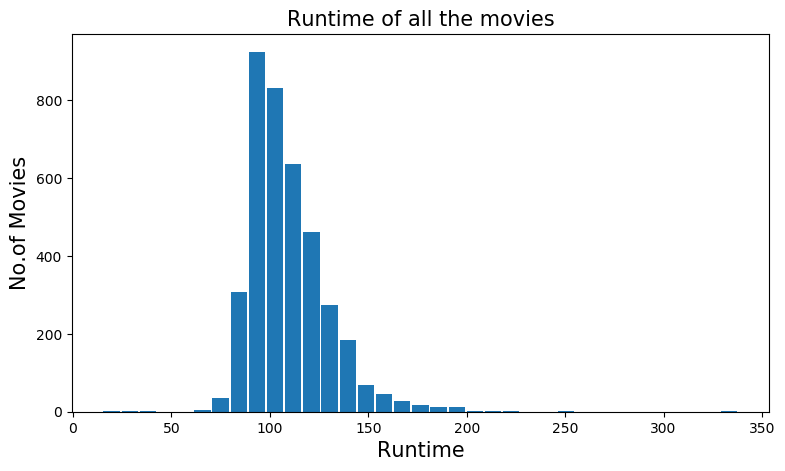

In [29]:
#plotting a histogram of runtime of movies

plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('No.of Movies', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(data['runtime'], rwidth = 0.9, bins =35)
plt.show()


The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.


**Lets analyse more about runtime of the movie using  Box Plot **

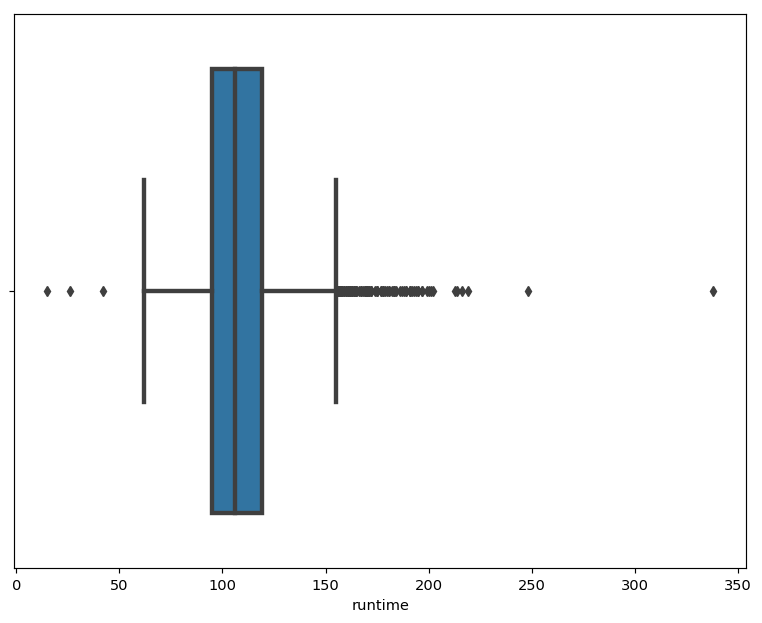

In [19]:
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(data['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies. we also get the outliners her if you carefully observe the plot.

                                                                         

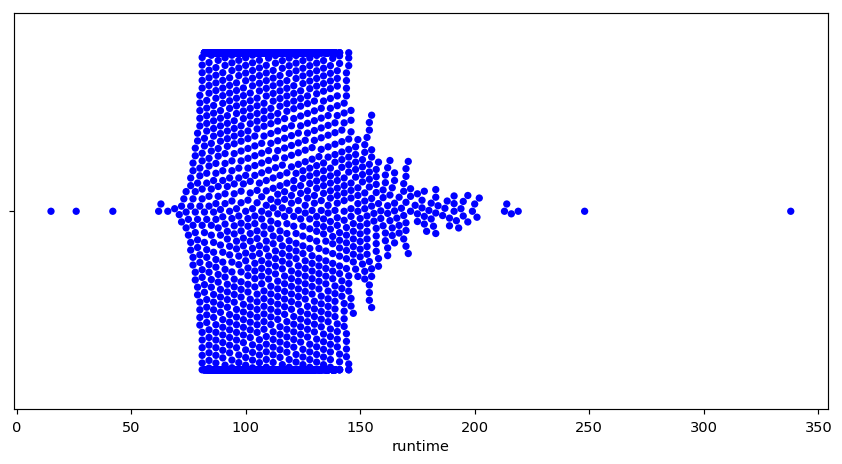

In [41]:
#The Second plots is the data points plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(data['runtime'], color = 'blue')
#displaying the plot
plt.show()

The plot generated above give a visual of complete distribution of runtime of movies by plotting the points againts their respective position in the ditribution

In [33]:
data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

By looking the plot and calculations, we can conclude that..

25% of movies have a runtime of less than 95 minutes
50% of movies have a runtime of less than 109 minutes. (median)
75% of movies have a runtime of less than 119 minutes

### Research Question 6 (Year of release vs Profitability)

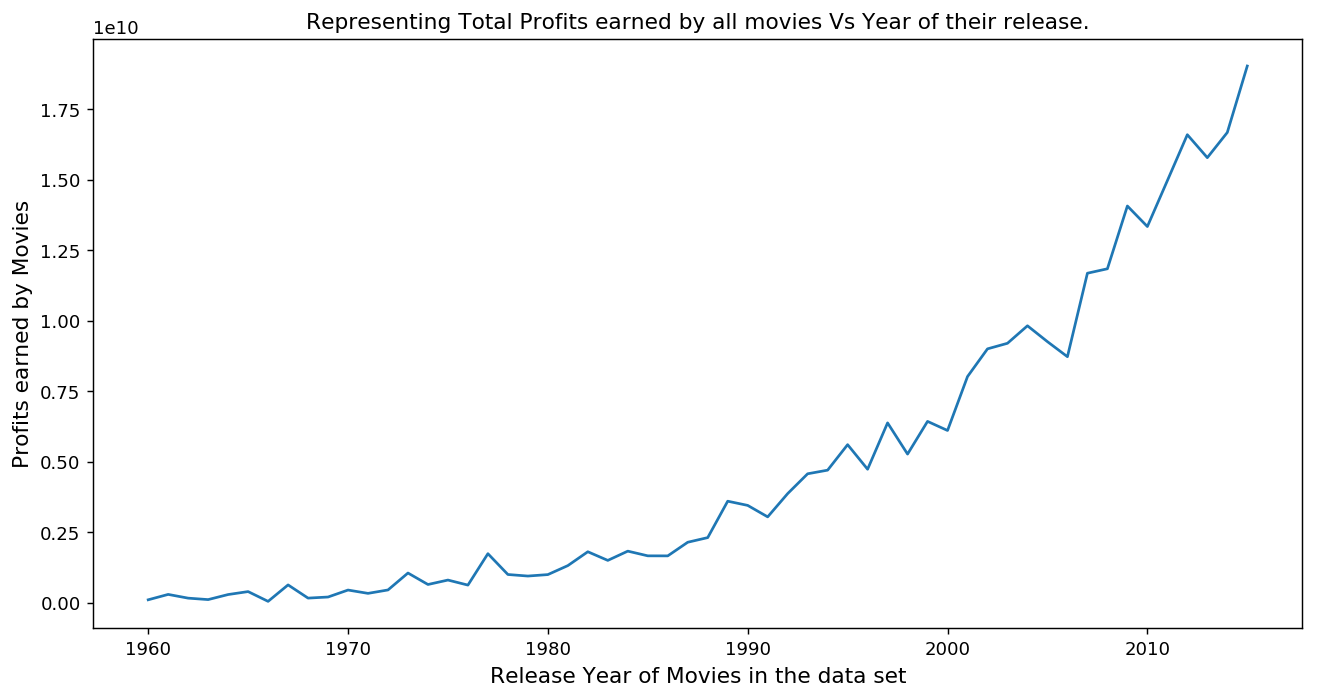

In [34]:
pyear = data.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')
plt.plot(pyear)
plt.show()

In [35]:
pyear.idxmax()

2015

So we can conclude that by graphically or calculation that 2015 was heighest profitable year

### With respect to the profitable movies
Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

### So lets fix this amount to 50 million dollar.

In [36]:
profit_data = data[data['profit_earned'] >= 50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
profit_data.head(3)

budget     revenue  profit_earned      original_title  \
1  150000000  1513528810     1363528810      Jurassic World   
2  150000000   378436354      228436354  Mad Max: Fury Road   
3  110000000   295238201      185238201           Insurgent   

                                                cast          director  \
1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
2  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
3  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                      tagline  runtime  \
1           The park is open.      124   
2          What a Lovely Day.      120   
3  One Choice Can Destroy You      119   

                                      genres release_date  release_year  
1  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
2  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
3         Adventure|Science Fiction|Thriller      3/18/15          2015

### Research Question 7 (Average Budget of the movies)

In [37]:
#New function for finding the average
def profit_avg(column):
    return profit_data[column].mean()

In [38]:
#calling this function for budget
profit_avg('budget')

60444957.76083707

### Research Question 8 ( Average Revenue earned by the movies)

In [39]:
profit_avg('revenue')

254957662.59491777

So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.



### Research Question 9 ( Average duration of the movies)

In [40]:
profit_avg('runtime')

113.66741405082212

So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

***For a Movie to be in successful criteria***

Average Budget must be around 60 millon dollar                                                                                  
Average duration of the movie must be 113 minutes                                                                               
Average Revenue earned was 225 dollar.                                                                                         

**Limitations**: This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.
